In [34]:
#-*- coding: utf-8 -*-
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
client_id = "OUuvgTQUVWExNh9fagSQ"
client_secret = "2E_d1CXQ2o"
url = "https://openapi.naver.com/v1/datalab/search";

# API 문서 https://developers.naver.com/docs/serviceapi/datalab/search/search.md#%ED%86%B5%ED%95%A9-%EA%B2%80%EC%83%89%EC%96%B4-%ED%8A%B8%EB%A0%8C%EB%93%9C-%EA%B0%9C%EC%9A%94
body = {"startDate":"2021-06-14", 
        "endDate":"2021-09-14", 
        "timeUnit":"date", 
        "keywordGroups":[{"groupName":"카카오", 
                          "keywords":["카카오","주가","규제"]}]}

body = json.dumps(body, ensure_ascii=False).encode('utf-8')

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    response_body = response_body.decode('utf-8')        
else:
    print("Error Code:" + rescode)

result = json.loads(response_body)
data = result['results'][0]['data']
time = [pd.to_datetime(i['period']) for i in data] 
value = [i['ratio'] for i in data]
data = pd.DataFrame({'Time':time, 'Trend_idx': value})
print(data)


         Time  Trend_idx
0  2021-06-14   46.31953
1  2021-06-15   47.86191
2  2021-06-16   37.37031
3  2021-06-17   43.78012
4  2021-06-18   64.00251
..        ...        ...
87 2021-09-09   97.35535
88 2021-09-10   60.90478
89 2021-09-11   10.63507
90 2021-09-12   10.12204
91 2021-09-13   61.24420

[92 rows x 2 columns]


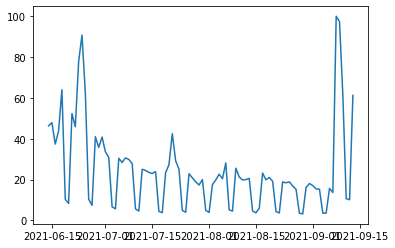

In [36]:
plt.plot(data['Time'], data['Trend_idx'])

In [39]:
data.tail(10)

,Time,Trend_idx
82,2021-09-04,3.53284
83,2021-09-05,3.53003
84,2021-09-06,15.68845
85,2021-09-07,13.64021
86,2021-09-08,100.00000
87,2021-09-09,97.35535
88,2021-09-10,60.90478
89,2021-09-11,10.63507
90,2021-09-12,10.12204
91,2021-09-13,61.24420
